### MNIST ###

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
x, y = mnist['data'], mnist['target']
# 70000 images and each image is 28 * 28 pixels
x.shape

(70000, 784)

In [4]:
# 70000 labels
y.shape

(70000,)

In [5]:
%matplotlib inline

In [6]:
import matplotlib
import matplotlib.pyplot as plt

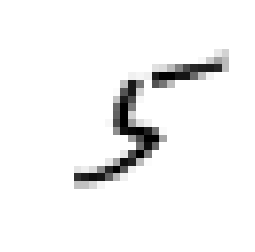

In [7]:
some_digit = x[35000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [8]:
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23,  45,
          0,   0],
       [  

In [9]:
y[35000]

5.0

In [10]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [11]:
import numpy as np

In [12]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

##### Training a Binary Classifier to classify 5 and not-5

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
from sklearn.linear_model import SGDClassifier

# 随机梯度下降的线性分类器

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(x_train, y_train_5)

sgd_classifier.predict([x[35000]])

/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ True])

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, x_train, y_train_5, cv=3, scoring='accuracy')

/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kwro

array([0.9445 , 0.96085, 0.962  ])

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_predict  = cross_val_predict(sgd_classifier, x_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_predict)

/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kwro

array([[53061,  1518],
       [ 1135,  4286]])

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_predict)

0.7384562370778773

In [18]:
recall_score(y_train_5, y_train_predict)

0.7906290352333518

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_train_5, y_train_predict))

             precision    recall  f1-score   support

      False       0.98      0.97      0.98     54579
       True       0.74      0.79      0.76      5421

avg / total       0.96      0.96      0.96     60000



In [45]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_predict)

0.8016070403673236

In [22]:
y_score = sgd_classifier.decision_function([x[35000]])
y_score

array([130807.78581565])

In [26]:
y_scores  = cross_val_predict(sgd_classifier, x_train, y_train_5, cv=3, method='decision_function')
y_scores

/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kwrongkey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/kwro

array([-702682.56557534, -791658.33162392,  -85708.3020218 , ...,
       -552033.46603945, -409122.7052894 , -465647.86213097])

In [27]:
from sklearn.metrics import precision_recall_curve

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precisions

array([0.09134721, 0.0913319 , 0.09133343, ..., 1.        , 1.        ,
       1.        ])

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0, 1])
    plt.xlim([-700000, 700000])

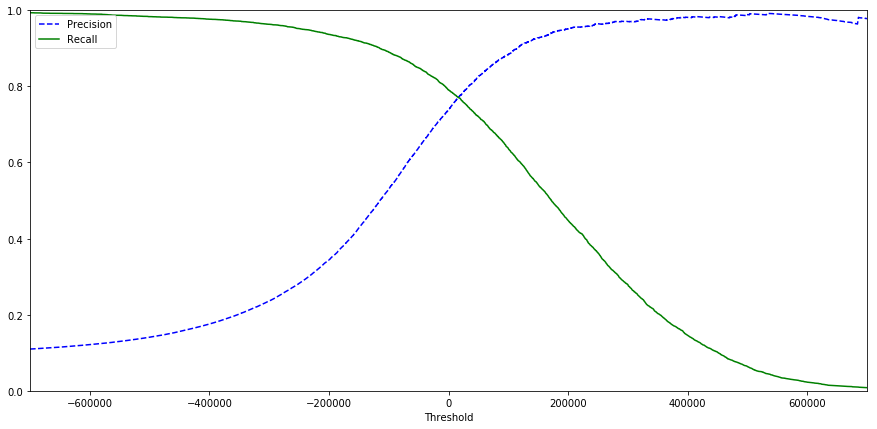

In [40]:
plt.figure(figsize=(15, 7))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [51]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], 'g-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision & Recall Tradeoff')
    plt.ylim([0, 1])
    plt.xlim([0, 1])

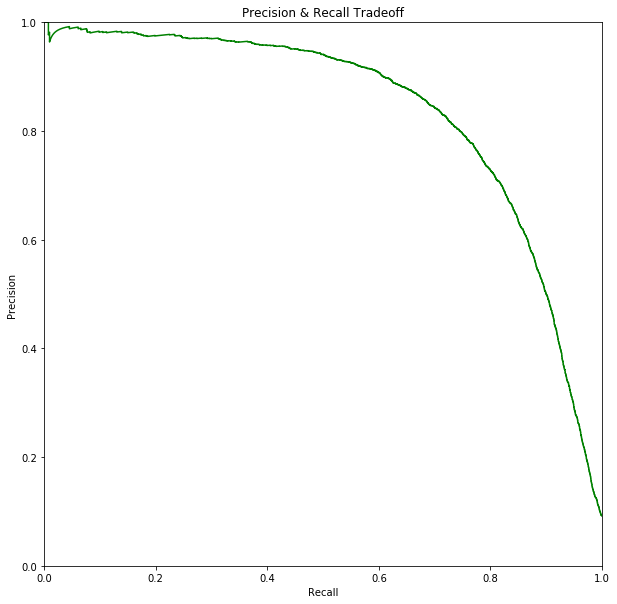

In [52]:
plt.figure(figsize=(10, 10))
plot_precision_vs_recall(precisions, recalls)

In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 1.83220653e-05, ...,
        9.87999047e-01, 9.87999047e-01, 1.00000000e+00]),
 array([1.84467810e-04, 7.74764804e-03, 7.74764804e-03, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([ 1007791.65746859,   709890.53180322,   707918.97970595, ...,
        -1481261.21522034, -1482005.80421026, -2982271.97468869]))

In [57]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

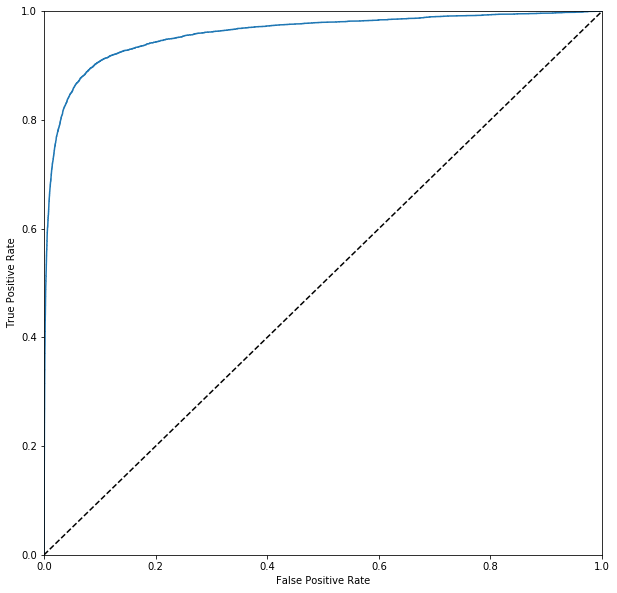

In [58]:
plt.figure(figsize=(10, 10))
plot_roc_curve(fpr, tpr)

In [61]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=16)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1]])

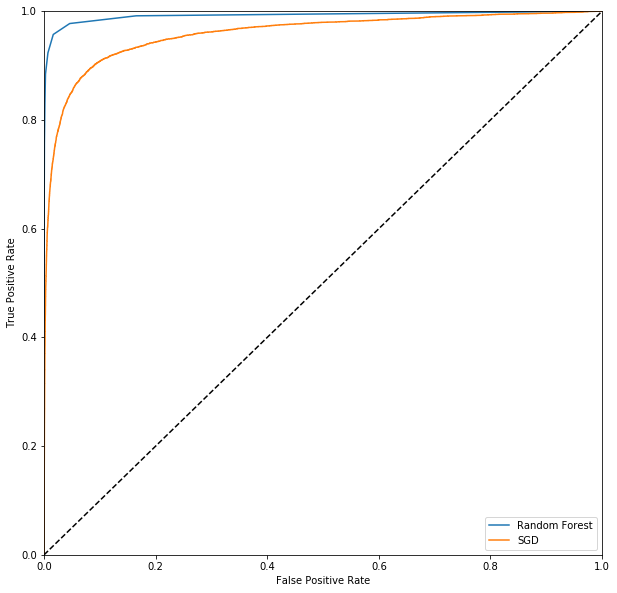

In [64]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.figure(figsize=(10, 10))
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plot_roc_curve(fpr, tpr, 'SGD')
plt.legend(loc='lower right')